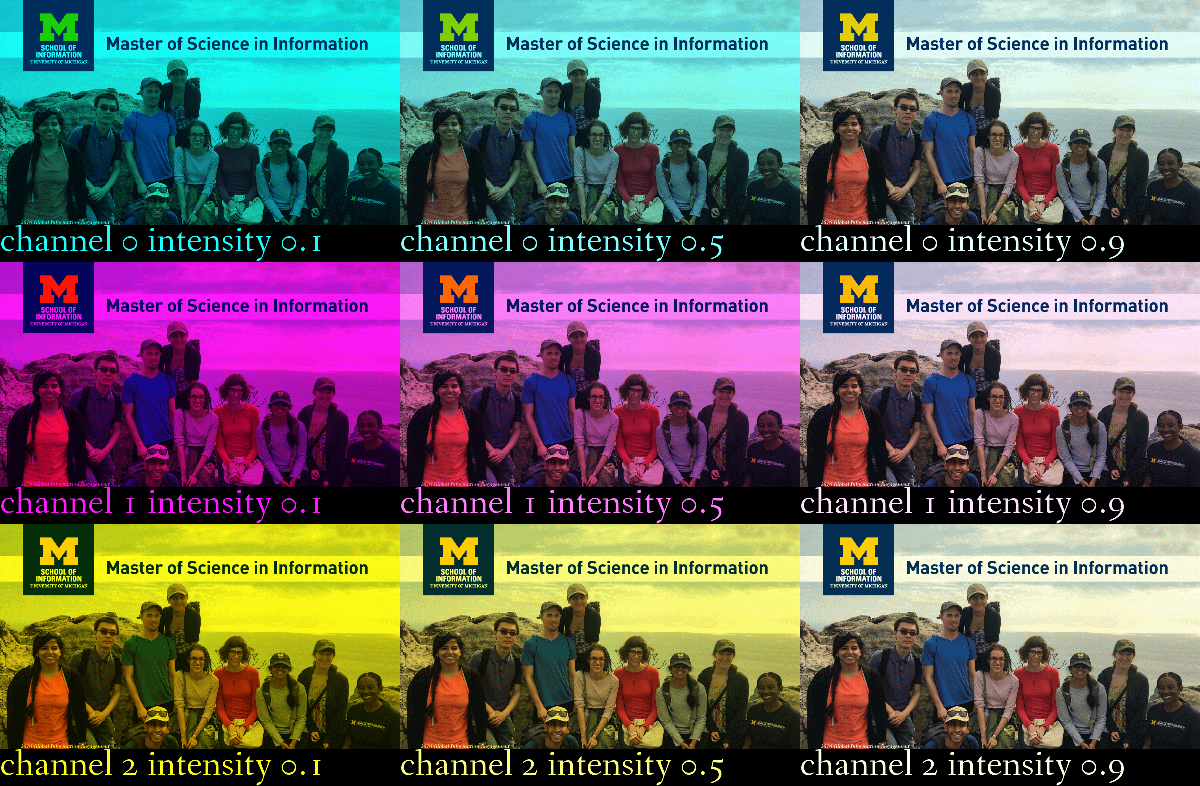

In [1]:
#
# Assignment 1 - Python Project: pillow, tesseract, and opencv
# Bob Kozdemba, 12/7/2019
#

import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

# Read the image and convert it to RGB. 
image=Image.open('readonly/msi_recruitment.gif')
image=image.convert('RGB')

# Create empty lists to hold the enhanced images.
images = []
textImages = []

# Get a font for the text.
fnt = ImageFont.truetype('readonly/fanwood-webfont.ttf', 75)

# Get the text size based on a sample string.
(textWidth, textHeight) = fnt.getsize('ABC0123456789gjqpy')

# Set a few constants to make the code more readable.
R, G, B, A = 0, 1, 2, 3

# For each color channel
for c in range(0, 3):
    # Reset the brightness and split the image into individual channels.
    brightness = [1, 1, 1, 1]
    source = image.split()
    # For each brightness, scale the current channel's brightness and merge
    # it into a new image.
    for b in range(1, 10, 4):
        brightness[c] = b/10
        newImage = Image.merge('RGB', (ImageEnhance.Brightness(source[R]).enhance(brightness[R]), 
                                       ImageEnhance.Brightness(source[G]).enhance(brightness[G]), 
                                       ImageEnhance.Brightness(source[B]).enhance(brightness[B])))
        # Append the finshed image to the image list.
        images.append(newImage)
                
        # Create a black image for the text.
        txtSize = (image.width, textHeight)
        txt = Image.new('RGB', txtSize, (0, 0, 0))
        
        # Get a drawing context for the text
        d = ImageDraw.Draw(txt)
        
        # Draw text
        d.text((0,0), "channel {} intensity {}".format(c, brightness[c]), font=fnt, fill=(255, 255, 255))
        
        # Scale the brightness and merge the channels of text image.
        newTxt = txt.split()
        outText = Image.merge('RGB', (ImageEnhance.Brightness(newTxt[R]).enhance(brightness[R]), 
                                      ImageEnhance.Brightness(newTxt[G]).enhance(brightness[G]), 
                                      ImageEnhance.Brightness(newTxt[B]).enhance(brightness[B])))
        
        # Append the finshed text image to the image list.
        textImages.append(outText)
        
# Create a contact sheet of different brightnesses.
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,(first_image.height + textHeight) *3))
x=0
y=0

for img, txtImg in zip(images, textImages):
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y))
    
    # Paste the text image below the image.
    contact_sheet.paste(txtImg, (x, y + img.height))
    
    #
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    #
    
    if x+first_image.width == contact_sheet.width:
        x=0
        # Include the height of the txt image.
        y=y+first_image.height + txtImg.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)